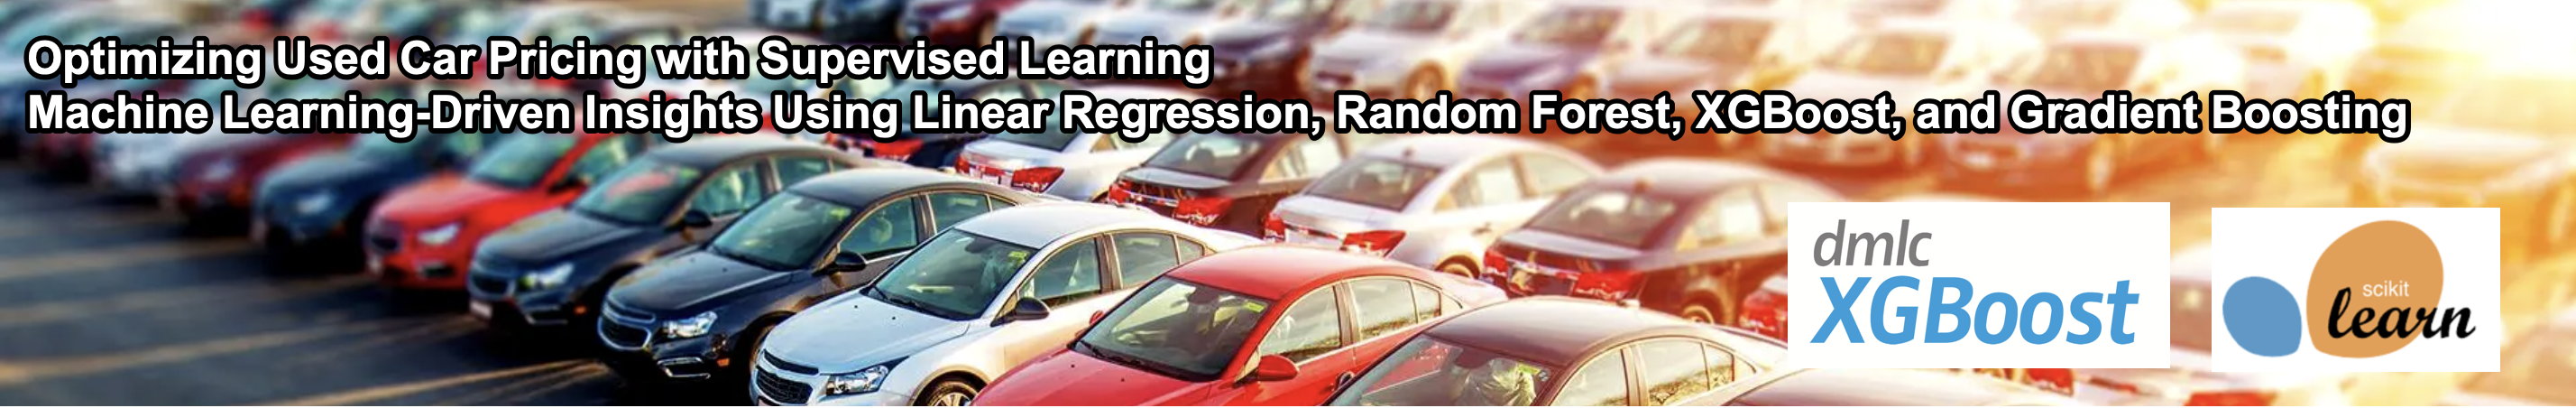

## 1. Introduction

Cars Cars Cars, a used car dealership, has commissioned our team to create a machine learning model that predicts the selling prices of used vehicles. Accurate price predictions are essential to maximize dealership profits, optimize inventory turnover, and offer fair pricing to customers. It is expected to provide a reliable and interpretable model that has strong predictive performance.

---

### Project Objectives

- Build a regression model to predict the **Selling Price** of used cars (supervised machine learning)
- Apply **data cleaning** and **feature engineering** techniques to prepare the data properly.
- Explore and benchmark multiple **regression models**.
- Use **hyperparameter tuning** to maximize performance.
- Select and recommend the best model based on evaluation metrics (Root Mean Squared Error, Mean Absolute Error, R² Score)
- Communicate findings and steps in an educational and transparent way.

By delivering a high-quality, well-documented model, we aim to establish ourselves as the preferred data science partner for future projects with Cars Cars Cars.

## 2. Data Loading

In [3]:
# 1. Importing Necessary Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings for better visuals
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
# 2. Load the Dataset
# Note: Replace 'car_data.csv' with the actual path if different
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,2013.63,4.66,7.63,36947.21,0.04
std,2.89,5.08,8.64,38886.88,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.90,1.20,15000.00,0.00
50%,2014.00,3.60,6.40,32000.00,0.00
75%,2016.00,6.00,9.90,48767.00,0.00
max,2018.00,35.00,92.60,500000.00,3.00


- The cars range from 2003 to 2018, with a median year of 2014.
- Selling prices range widely from 0.10 to 35, with a median of around 3.6, suggesting a broad price spectrum from budget to premium vehicles.
- Present prices (if bought new) extend up to 92.6, though such high values are rare and likely represent luxury models.
- Kilometers driven is also highly variable, with some vehicles over 500,000 km, indicating potential outliers worth reviewing during preprocessing.

## 3. Data Cleaning

### 3.1 Null Values

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### 3.2 Duplicates

In [12]:
duplicates = df.duplicated()
duplicates.sum()

2

In [13]:
df = df[~duplicates]
df.duplicated().sum()

0

## 4. EDA

### 4.1 Numeric Distributions

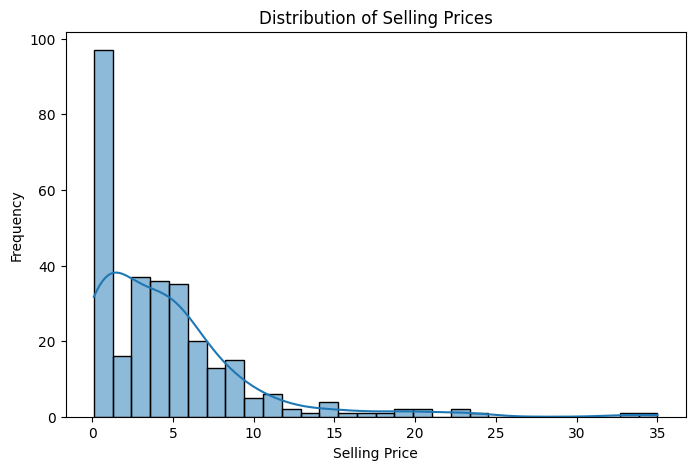

Skewness of Selling Price: 2.54


In [16]:
# Selling Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# Checking for skewness
print(f"Skewness of Selling Price: {df['Selling_Price'].skew():.2f}")

The distribution of selling prices is heavily skewed (2.53), with most vehicles priced below 10 and a long tail representing a small number of high-value outliers. This shows that the majority of car is around entry to mid-range vehicles, while luxury models appear infrequently. This insight reinforces the importance of outlier handling and potentially applying transformations or robust models that can accommodate non-normal target distributions.

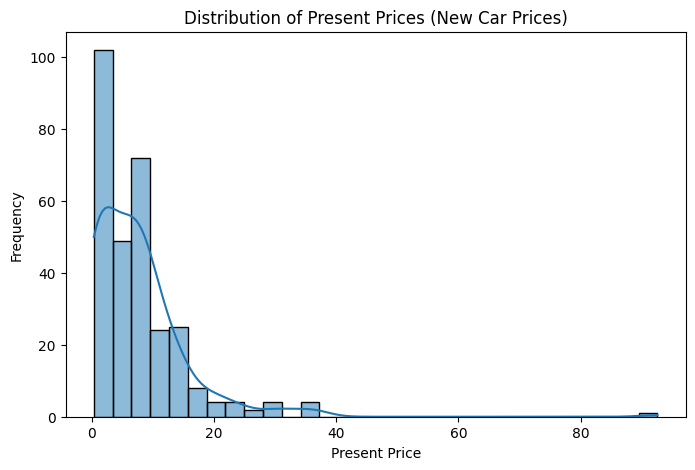

In [18]:
# Distribution of 'Present_Price'
plt.figure(figsize=(8,5))
sns.histplot(df['Present_Price'], kde=True, bins=30)
plt.title('Distribution of Present Prices (New Car Prices)')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.show()

- **Present Price (New Car Price):**
This feature is highly right-skewed with a few luxury models extend the range, though these are rare. This pattern suggests that while most of the inventory is mid-market, some high-end listings may require special handling during modeling.

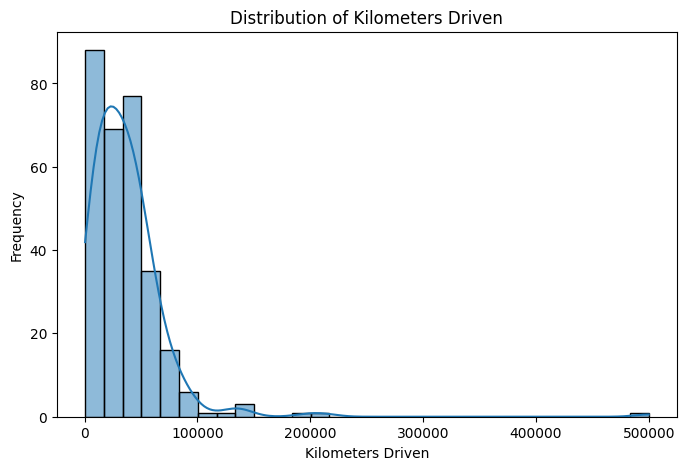

In [20]:
# Distribution of 'Kms_Driven'
plt.figure(figsize=(8,5))
sns.histplot(df['Kms_Driven'], kde=True, bins=30)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

- **Kilometers Driven:**
The distribution shows a gradual decline from lower to higher mileage, with the majority of vehicles driven under 80,000 km. A few entries exceed 150,000 km — which could influence resale value and model performance. These long-tail entries may be considered for outlier review.

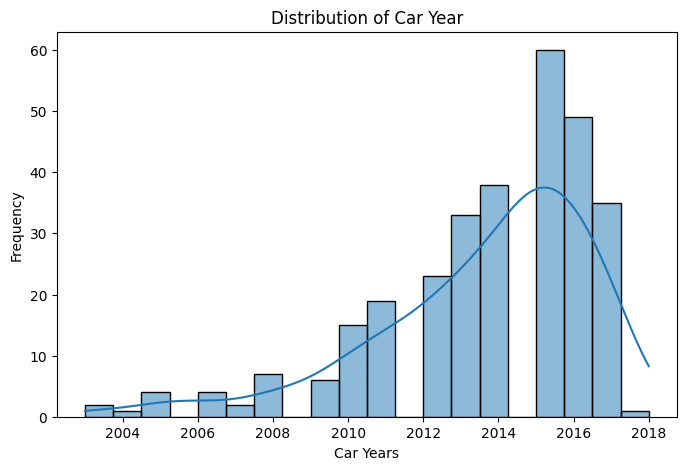

In [22]:
# Distribution of 'Car_Age'
plt.figure(figsize=(8,5))
sns.histplot(df['Year'], kde=True, bins=20)
plt.title('Distribution of Car Year')
plt.xlabel('Car Years')
plt.ylabel('Frequency')
plt.show()

- **Car Year:**
Most cars in the dataset are relatively recent, with a strong concentration from 2012 to 2017. Listings older than 2010 are infrequent. This also supports the creation of a derived feature like Car_Age, which has clearer predictive power and is easier for the model to interpret.

### 4.2 Categorical Features

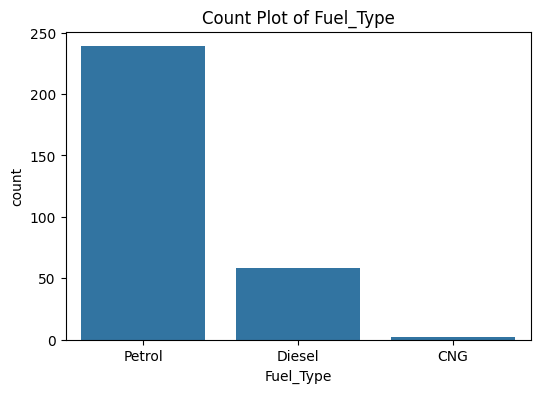

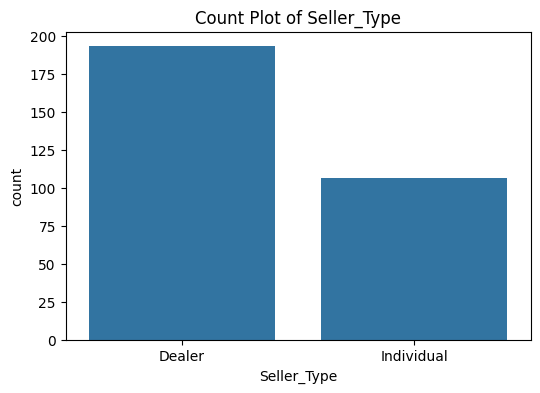

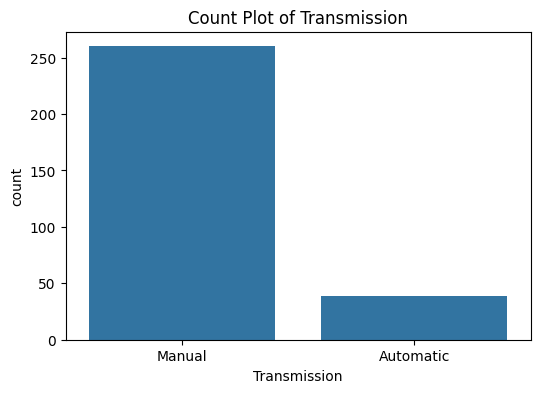

In [25]:
# Bar plots for categorical features

categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission']

for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot of {feature}')
    plt.show()

- **Fuel Type:** The vast majority of cars run on petrol, followed by diesel. CNG vehicles are extremely rare, appearing in just a handful of cases — something to keep in mind during encoding or model interpretation.

- **Seller Type:** Most listings come from dealers, but a significant portion (around one-third) are being sold by individual owners. This mix reflects both commercial inventory and private resale activity.

- **Transmission:** Manual transmission dominates the dataset, with automatic vehicles accounting for a much smaller share. This may reflect broader market trends or inventory preferences.

### 4.3 Scatter Plots 

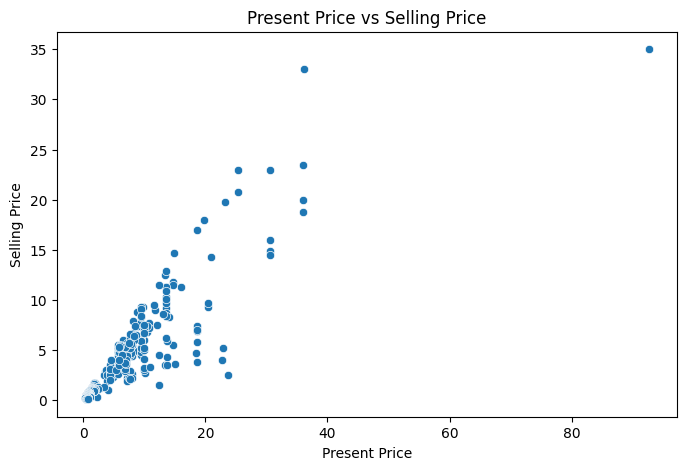

In [28]:
# Present Price vs Selling Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

There's a strong positive relationship as expected, cars that are more expensive when new tend to command higher resale values. However, the relationship is not perfectly linear, and a few luxury vehicles appear as visible outliers. These high-value cases may benefit from tailored treatment or segmentation.

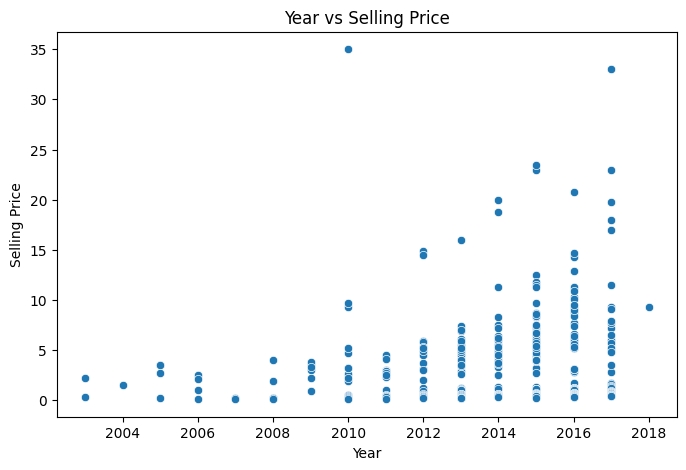

In [30]:
# Car Age vs Selling Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

Newer cars (2015–2018) consistently show higher selling prices, while older cars from 2003 to 2010 typically cluster in the lower resale range. This aligns with typical depreciation curves and confirms that age is a critical predictor for modeling.

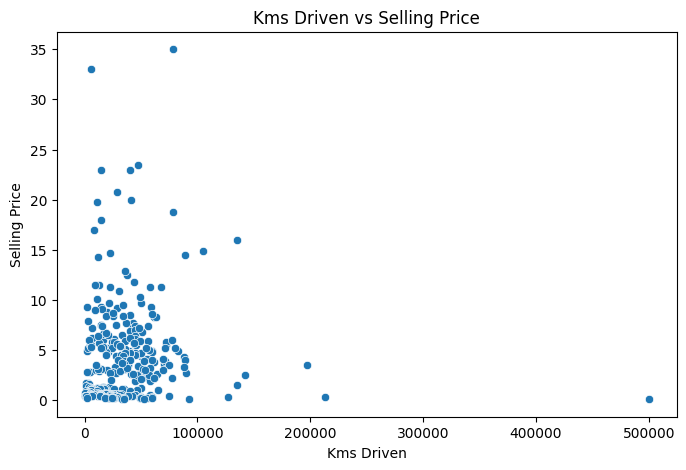

In [32]:
# Kms Driven vs Selling Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.title('Kms Driven vs Selling Price')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.show()

The expected inverse relationship is visible here — cars with higher mileage generally sell for less. However, the spread is wide, indicating that mileage alone doesn't determine price. Other factors like brand, condition, and original price likely moderate this relationship.

### 4.4 Boxplots (Outliers)

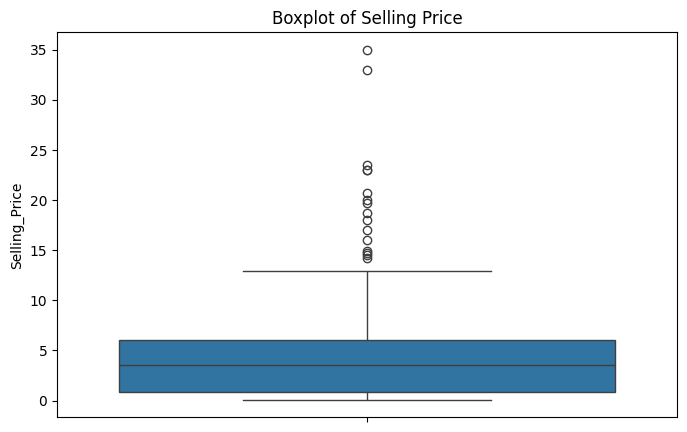

In [35]:
# Selling Price Outliers
plt.figure(figsize=(8,5))
sns.boxplot(y='Selling_Price', data=df)
plt.title('Boxplot of Selling Price')
plt.show()

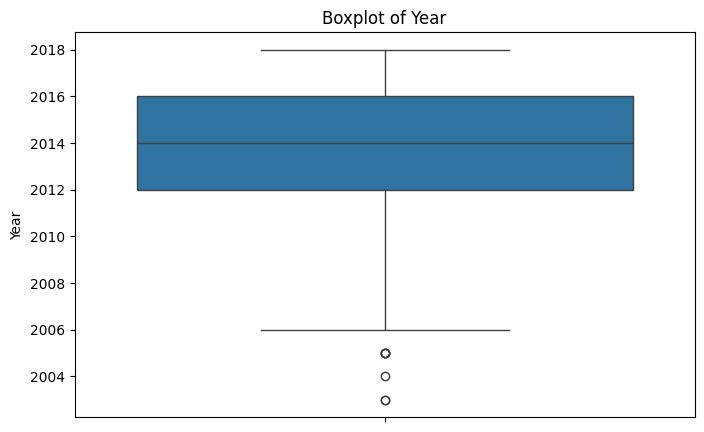

In [54]:
# Year Outliers
plt.figure(figsize=(8,5))
sns.boxplot(y='Year', data=df)
plt.title('Boxplot of Year')
plt.show()

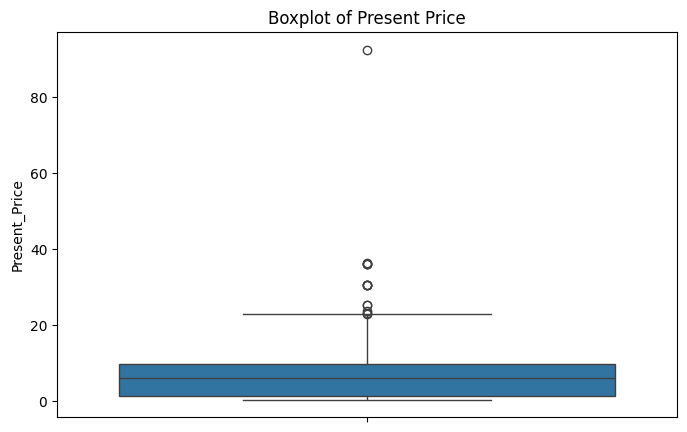

In [52]:
# Year Outliers
plt.figure(figsize=(8,5))
sns.boxplot(y='Present_Price', data=df)
plt.title('Boxplot of Present Price')
plt.show()

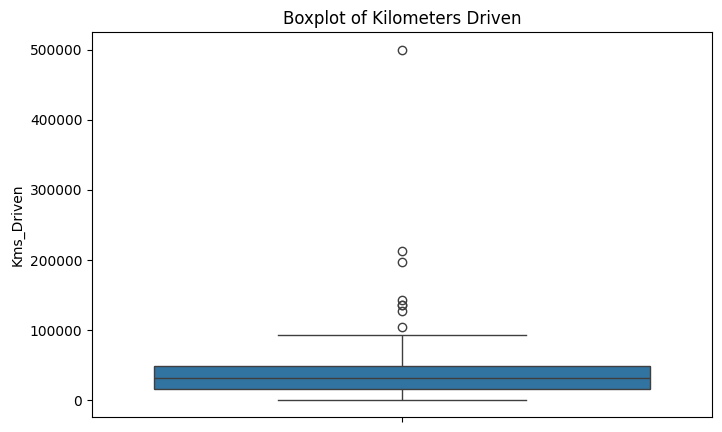

In [56]:
# Kms Driven Outliers
plt.figure(figsize=(8,5))
sns.boxplot(y='Kms_Driven', data=df)
plt.title('Boxplot of Kilometers Driven')
plt.show()

The boxplot of Selling Price highlights a strong right skew, with several high-value outliers. While these may represent premium vehicles, they can distort model training, especially for linear approaches. Similarly, Present Price shows a few extremely high-priced cars, confirming the need for robust models or outlier mitigation. Kms Driven also contains upper-end outliers, likely from heavily used or older vehicles, though less extreme than price features.

Based on the results of the boxplots we will create **limits** which we will use to clean outliers (Section 6.3)

## 5. Feature Engineering

### 5.1 Car Age

In [58]:
# Find max Year from the dataset
reference_year = df['Year'].max()

# Calculate Car_Age based on dataset's latest year
df['Car_Age'] = reference_year - df['Year']

# Drop 'Year' Column
df.drop('Year', axis=1, inplace=True)

### 5.2 Encode Categorical Variables

- **'Fuel_Type'** → 3 categories → One-Hot Encoding (avoid ordering assumption)
- **'Seller_Type'** → 2 categories → Binary Encoding
- **'Transmission'** → 2 categories → Binary Encoding

In [62]:
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    print(f"{col}: {df[col].unique()}")

Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Seller_Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']


#### 5.2.1 One-Hot Encoding

In [65]:
# 3.1 Encoding 'Fuel_Type' with One-Hot Encoding
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,3.35,5.59,27000,Dealer,Manual,0,4,False,True
1,sx4,4.75,9.54,43000,Dealer,Manual,0,5,True,False
2,ciaz,7.25,9.85,6900,Dealer,Manual,0,1,False,True
3,wagon r,2.85,4.15,5200,Dealer,Manual,0,7,False,True
4,swift,4.60,6.87,42450,Dealer,Manual,0,4,True,False
...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Dealer,Manual,0,2,True,False
297,brio,4.00,5.90,60000,Dealer,Manual,0,3,False,True
298,city,3.35,11.00,87934,Dealer,Manual,0,9,False,True
299,city,11.50,12.50,9000,Dealer,Manual,0,1,True,False


#### 5.2.2 Label Encoding

In [68]:
# 3.2 Encoding 'Seller_Type' and 'Transmission' with Label Encoding (manual mapping)
df['Seller_Type'] = df['Seller_Type'].map({'Dealer': 0, 'Individual': 1})
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,3.35,5.59,27000,0,0,0,4,False,True
1,sx4,4.75,9.54,43000,0,0,0,5,True,False
2,ciaz,7.25,9.85,6900,0,0,0,1,False,True
3,wagon r,2.85,4.15,5200,0,0,0,7,False,True
4,swift,4.60,6.87,42450,0,0,0,4,True,False
...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,0,0,0,2,True,False
297,brio,4.00,5.90,60000,0,0,0,3,False,True
298,city,3.35,11.00,87934,0,0,0,9,False,True
299,city,11.50,12.50,9000,0,0,0,1,True,False


### 5.3 Optimize Readability and Check

In [71]:
columns_order = [
    'Car_Name', 'Present_Price', 'Kms_Driven', 'Owner',
    'Car_Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
    'Seller_Type', 'Transmission', 'Selling_Price'
]
df = df[columns_order]
df

,Car_Name,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type,Transmission,Selling_Price
0,ritz,5.59,27000,0,4,False,True,0,0,3.35
1,sx4,9.54,43000,0,5,True,False,0,0,4.75
2,ciaz,9.85,6900,0,1,False,True,0,0,7.25
3,wagon r,4.15,5200,0,7,False,True,0,0,2.85
4,swift,6.87,42450,0,4,True,False,0,0,4.60
...,...,...,...,...,...,...,...,...,...,...
296,city,11.60,33988,0,2,True,False,0,0,9.50
297,brio,5.90,60000,0,3,False,True,0,0,4.00
298,city,11.00,87934,0,9,False,True,0,0,3.35
299,city,12.50,9000,0,1,True,False,0,0,11.50


In [73]:
df.dtypes

Car_Name             object
Present_Price       float64
Kms_Driven            int64
Owner                 int64
Car_Age               int64
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
Seller_Type           int64
Transmission          int64
Selling_Price       float64
dtype: object

In [75]:
df.isnull().sum()

Car_Name            0
Present_Price       0
Kms_Driven          0
Owner               0
Car_Age             0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
Seller_Type         0
Transmission        0
Selling_Price       0
dtype: int64

### 5.4 Correlation Matrix after Feature Engineering

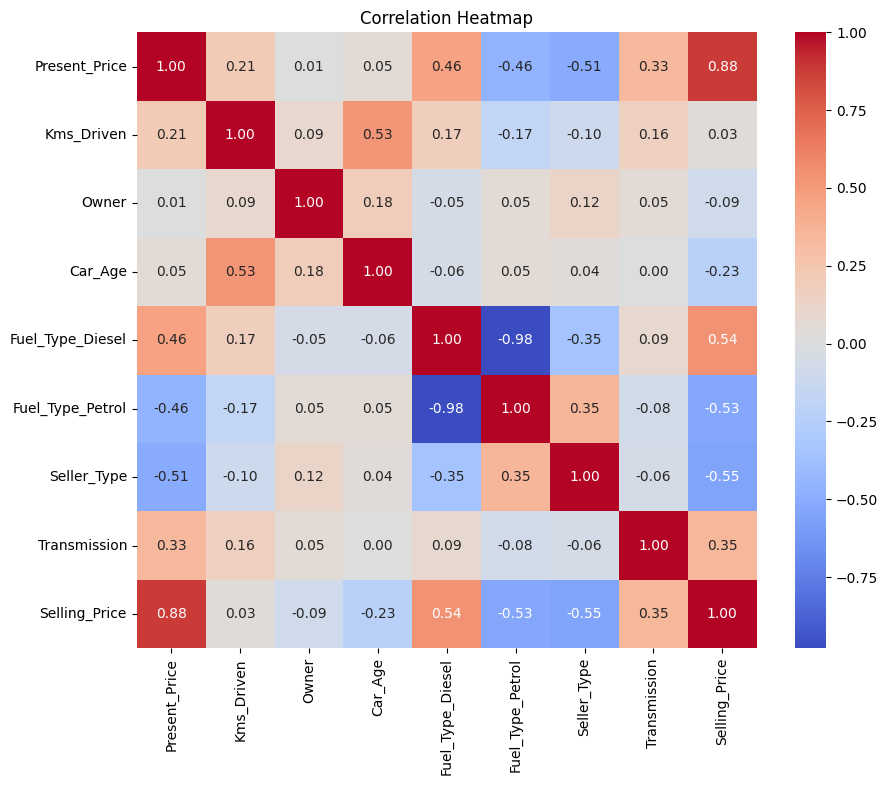

In [78]:
# Correlation Matrix
plt.figure(figsize=(10,8))
corr_matrix = df.drop('Car_Name', axis=1).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The heatmap confirms that Present Price is the strongest predictor of Selling Price (correlation = 0.88), which aligns with domain expectations—cars that were more expensive when new tend to retain more value.

Fuel_Type_Diesel also shows a moderate positive correlation (0.54), indicating diesel vehicles generally command higher resale prices. On the flip side, Fuel_Type_Petrol and Seller_Type have moderate negative correlations with Selling Price, suggesting petrol cars and individual sellers tend to fetch lower prices.

Car_Age has a weak negative correlation (-0.23), which may reflect a nonlinear depreciation pattern. The variable Kms_Driven is weakly correlated, though higher usage intuitively lowers price, its standalone impact seems limited.

Interestingly, multicollinearity appears between Fuel_Type_Diesel and Fuel_Type_Petrol (correlation = -0.98), which is expected due to one-hot encoding of mutually exclusive categories. This reinforces the need for VIF analysis to manage redundancy when using linear models.

Overall, the correlation matrix validates both the selection of core predictors and the modeling approach (tree-based), which can flexibly capture these interactions without overfitting to multicollinear patterns.

## 6. Model Preparation

### 6.1. Define Features (X) and Target (y)

In [616]:
# Drop 'Car_Name' because it's textual and not predictive in this first modeling step
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

### 6.2 Train-Test Split

In [619]:
from sklearn.model_selection import train_test_split

# 80% Training - 20% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")

Training Set: 239 samples
Test Set: 60 samples


### 6.3 Handle Outliers

In [622]:
# Define manual upper limits based on visual inspection from boxplots
limits = {
    'Selling_Price': 25,
    'Present_Price': 40,
    'Kms_Driven': 200000,
    'Car_Age': 13
}

# Apply filters only to training data to avoid data leakage
train_filter = (
    (y_train <= limits['Selling_Price']) &
    (X_train['Present_Price'] <= limits['Present_Price']) &
    (X_train['Kms_Driven'] <= limits['Kms_Driven']) &
    (X_train['Car_Age'] <= limits['Car_Age'])
)

# Apply filter
X_train = X_train[train_filter]
y_train = y_train[train_filter]

# Recheck dimensions
print(f"Cleaned Training Set: {X_train.shape[0]} samples")

Cleaned Training Set: 235 samples


### 6.4 Feature Scaling

In [625]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6.5. Multicollinearity (VIF)

#### 6.5.1 Analysis

In [629]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert scaled X_train to DataFrame for VIF calculation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
                   for i in range(X_train_scaled_df.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
4,Fuel_Type_Diesel,37.17
5,Fuel_Type_Petrol,36.91
0,Present_Price,2.59
1,Kms_Driven,2.33
3,Car_Age,1.89
6,Seller_Type,1.68
7,Transmission,1.36
2,Owner,1.07


We detected strong multicollinearity between the fuel type indicators Diesel and Petrol. To maintain model stability and improve interpretability, we will drop the Fuel Type Petrol. This step preserves all relevant information while eliminating mathematical instability

#### 6.5.2 Optimize Multicollinearity

In [633]:
# Drop Fuel_Type_Petrol
X = X.drop('Fuel_Type_Petrol', axis=1)

# Perform the corrected train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (239, 7)
Test shape: (60, 7)


In [635]:
# Apply filters only to training data to avoid data leakage
train_filter = (
    (y_train <= limits['Selling_Price']) &
    (X_train['Present_Price'] <= limits['Present_Price']) &
    (X_train['Kms_Driven'] <= limits['Kms_Driven']) &
    (X_train['Car_Age'] <= limits['Car_Age'])
)

# Apply filter
X_train = X_train[train_filter]
y_train = y_train[train_filter]

# Recheck dimensions
print(f"Cleaned Training Set: {X_train.shape[0]} samples")

Cleaned Training Set: 235 samples


In [637]:
# Initialize and fit scaler on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled X_train to DataFrame for VIF calculation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
                   for i in range(X_train_scaled_df.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
0,Present_Price,2.59
1,Kms_Driven,2.33
3,Car_Age,1.88
5,Seller_Type,1.67
4,Fuel_Type_Diesel,1.52
6,Transmission,1.36
2,Owner,1.07


Multicollinearity is now handled and the model ready for training

## 7. Baseline Model Training

### 7.1 Import Regression Models and Evaluation Settings

In [642]:
# Import Regression Models and Evaluation Metrics

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Helper function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    results = {
        'Model': name,
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test)
    }
    return results

### 7.2 Train and Evaluate Models

In [645]:
# 5. Train and Evaluate Models

baseline_results = []

# Linear Regression
lin_reg = LinearRegression()
baseline_results.append(
    evaluate_model('Linear Regression', lin_reg, X_train_scaled, X_test_scaled, y_train, y_test)
)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
baseline_results.append(
    evaluate_model('Ridge Regression', ridge_reg, X_train_scaled, X_test_scaled, y_train, y_test)
)

# Lasso Regression
lasso_reg = Lasso(alpha=0.001)
baseline_results.append(
    evaluate_model('Lasso Regression', lasso_reg, X_train_scaled, X_test_scaled, y_train, y_test)
)

baseline_results_df = pd.DataFrame(baseline_results)
baseline_results_df = baseline_results_df.sort_values(by='Test RMSE')

baseline_results_df


,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
1,Ridge Regression,1.32,2.92,0.92,1.59,0.92,0.67
2,Lasso Regression,1.32,2.94,0.92,1.59,0.92,0.66
0,Linear Regression,1.32,2.94,0.92,1.59,0.92,0.66


These results reflect the performance of three baseline linear models: Linear Regression, Ridge Regression, and Lasso RegressionAll three models exhibit nearly identical training metrics, indicating that they capture the core patterns in the data similarly. Ridge Regression edges out slightly on test performance, suggesting that a small amount of L2 regularization helps reduce overfitting marginally. However, the relatively higher test RMSE and lower R² values (around 0.66–0.67) imply that linear models are limited in capturing the nonlinear relationships present in this dataset. This reinforces the case for leveraging more advanced models like XGBoost for improved predictive accuracy.

## 8. Advanced Model Training

### 8.1 Import Advanced Models and Evaluation Settings

In [650]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Helper Function to Evaluate Models

def evaluate_model_ensemble(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    results = {
        'Model': name,
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test)
    }
    return results

### 8.2 Train and Evaluate Models

In [653]:
advanced_results = []

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
advanced_results.append(
    evaluate_model_ensemble('Random Forest', rf_model, X_train, X_test, y_train, y_test)
)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
advanced_results.append(
    evaluate_model_ensemble('Gradient Boosting', gb_model, X_train, X_test, y_train, y_test)
)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
advanced_results.append(
    evaluate_model_ensemble('XGBoost', xgb_model, X_train, X_test, y_train, y_test)
)

# Create Results DataFrame

advanced_results_df = pd.DataFrame(advanced_results)
advanced_results_df = advanced_results_df.sort_values(by='Test RMSE')

advanced_results_df

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
1,Gradient Boosting,0.27,2.18,0.20,1.05,1.00,0.82
2,XGBoost,0.08,2.22,0.06,1.08,1.00,0.81
0,Random Forest,0.35,2.85,0.19,1.28,0.99,0.69


The evaluation of ensemble models demonstrates a clear advantage over linear approaches, with all three delivering notably stronger test performance. Gradient Boosting emerges as the top performer, achieving the lowest test RMSE (2.18) and highest test R² (0.82), indicating its superior ability to generalize from the training data. XGBoost closely follows with comparable accuracy, reinforcing its reputation as a powerful and flexible algorithm. Meanwhile, Random Forest lags behind slightly, especially in generalization, as seen in its lower test R² (0.69). Overall, boosting methods—particularly Gradient Boosting and XGBoost—are more effective at capturing the complex, nonlinear relationships in the data.

### 8.3 Random Forest: Hyperparameter Tuning

#### 8.3.1 Model and Parameters

In [657]:
# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 300, 500, 800, 1200],
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

#### 8.3.2 Randomized Search

In [660]:
from sklearn.model_selection import RandomizedSearchCV

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform Random Search
rf_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

#### 8.3.3 Evaluation

In [662]:
# Best parameters and model
rf_random_search.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [663]:
best_rf_model = rf_random_search.best_estimator_
best_rf_model

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=1200,
                      random_state=42)

In [664]:
rf_final_results = evaluate_model_ensemble('Random Forest (Tuned)', best_rf_model, X_train, X_test, y_train, y_test)
rf_final_results

{'Model': 'Random Forest (Tuned)',
 'Train RMSE': 0.42969936577864626,
 'Test RMSE': 2.3485055516014595,
 'Train MAE': 0.2584756071582919,
 'Test MAE': 1.0499284762413699,
 'Train R²': 0.9911234618467998,
 'Test R²': 0.785999991838545}

### 8.4 Gradient Boosting: Hyperparameter Tuning

#### 8.4.1 Model and Parameters

In [667]:
# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Define parameter grid
gb_param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

#### 8.4.2 Randomized Search

In [669]:
# Setup RandomizedSearchCV
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_grid,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform Random Search
gb_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 800],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

#### 8.4.3 Evaluation

In [671]:
# Best parameters and model
gb_random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 3,
 'learning_rate': 0.1}

In [672]:
best_gb_model = gb_random_search.best_estimator_
best_gb_model

GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          n_estimators=300, random_state=42, subsample=0.8)

In [673]:
# Evaluate Best Gradient Boosting
gb_final_results = evaluate_model_ensemble('Gradient Boosting (Tuned)', best_gb_model, X_train, X_test, y_train, y_test)
gb_final_results

{'Model': 'Gradient Boosting (Tuned)',
 'Train RMSE': 0.18470965320300625,
 'Test RMSE': 2.168604167095844,
 'Train MAE': 0.1344142435134125,
 'Test MAE': 1.0087071997893222,
 'Train R²': 0.9983598129275734,
 'Test R²': 0.8175301212164531}

### 8.5 XGBoost: Hyperparameter Tuning

#### 8.5.1 Model and Parameters

In [676]:
# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid
xgb_param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#### 8.5.2 Randomized Search

In [678]:
# Setup RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform Random Search
xgb_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimato

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 300, 500, 800],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

#### 8.5.3 Evaluation

In [680]:
# Best parameters and model
xgb_random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 800,
 'max_depth': 3,
 'learning_rate': 0.2,
 'colsample_bytree': 0.8}

In [684]:
best_xgb_model = xgb_random_search.best_estimator_
best_xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [685]:
# Evaluate Best XGBoost
xgb_final_results = evaluate_model_ensemble('XGBoost (Tuned)', best_xgb_model, X_train, X_test, y_train, y_test)
xgb_final_results

{'Model': 'XGBoost (Tuned)',
 'Train RMSE': 0.019358458765360916,
 'Test RMSE': 1.6933575968666887,
 'Train MAE': 0.01392109432626277,
 'Test MAE': 0.8853058257748683,
 'Train R²': 0.9999819841086419,
 'Test R²': 0.8887428403070471}

### 8.6 Compare tuned Models

In [701]:
# Compare tuned models
final_tuned_results = pd.DataFrame([rf_final_results, gb_final_results, xgb_final_results])
final_tuned_results.sort_values(by='Test RMSE')

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
2,XGBoost (Tuned),0.02,1.69,0.01,0.89,1.00,0.89
1,Gradient Boosting (Tuned),0.18,2.17,0.13,1.01,1.00,0.82
0,Random Forest (Tuned),0.43,2.35,0.26,1.05,0.99,0.79


After hyperparameter tuning, the performance of all three ensemble models improved, but XGBoost (Tuned) clearly stands out. With a test RMSE of 1.69 and a test R² of 0.89, it demonstrates the best predictive accuracy and generalization among the models. Gradient Boosting (Tuned) also shows solid performance (test R²: 0.82), while Random Forest, although improved, still trails behind slightly with a test R² of 0.79. These results reinforce that XGBoost, when carefully tuned, is the most effective model for capturing the underlying structure of the data.

### 8.7 XGBoost: Grid Search

#### 8.7.1 Model and Parameters

In [725]:
from sklearn.model_selection import GridSearchCV

# Base model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)

# Narrowed grid based on prior RandomSearch results
xgb_param_grid = {
    'n_estimators': [700, 800, 900],                # around 800
    'learning_rate': [0.15, 0.2, 0.25],             # around 0.2
    'max_depth': [2, 3, 4],                         # tighter around 3
    'subsample': [0.7, 0.8, 0.9],                   # around 0.8
    'colsample_bytree': [0.7, 0.8, 0.9],            # around 0.8
    'gamma': [0, 0.05, 0.1],                        # slight regularization
    'reg_alpha': [0, 0.05, 0.1],                    # L1 regularization
    'reg_lambda': [1, 1.2, 1.5]                     # L2 regularization
}

#### 8.7.2 Grid Search

In [ ]:
# Setup GridSearchCV
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=3,
    n_jobs=-1
)

# Fit model
xgb_grid_search.fit(X_train, y_train)

#### 8.7.3 Evaluation

In [729]:
xgb_grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.1,
 'learning_rate': 0.2,
 'max_depth': 2,
 'n_estimators': 800,
 'reg_alpha': 0.1,
 'reg_lambda': 1.2,
 'subsample': 0.7}

In [730]:
best_xgb_grid_model = xgb_grid_search.best_estimator_
best_xgb_grid_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [731]:
# Evaluate
xgb_grid_results = evaluate_model_ensemble('XGBoost (Grid Tuned)', best_xgb_grid_model, X_train, X_test, y_train, y_test)
xgb_grid_results

{'Model': 'XGBoost (Grid Tuned)',
 'Train RMSE': 0.2085099816526102,
 'Test RMSE': 1.6422804499673362,
 'Train MAE': 0.15677613331662846,
 'Test MAE': 0.7555143650372822,
 'Train R²': 0.9979098959880935,
 'Test R²': 0.8953533684215017}

In [736]:
# Compare tuned models
final_tuned_results = pd.DataFrame([rf_final_results, gb_final_results, xgb_final_results, xgb_grid_results])
final_tuned_results.sort_values(by='Test RMSE')

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
3,XGBoost (Grid Tuned),0.21,1.64,0.16,0.76,1.00,0.90
2,XGBoost (Tuned),0.02,1.69,0.01,0.89,1.00,0.89
1,Gradient Boosting (Tuned),0.18,2.17,0.13,1.01,1.00,0.82
0,Random Forest (Tuned),0.43,2.35,0.26,1.05,0.99,0.79


After applying a focused grid search around the previously identified best parameters, the XGBoost (Grid Tuned) model delivered the strongest overall performance. It achieved a Test RMSE of 1.64 and a Test R² of 0.90, representing the most accurate and stable predictions across all tested models.

Notably, it outperformed the earlier version of XGBoost (Tuned via Random Search), improving generalization while slightly relaxing the overfit seen in the training set. Gradient Boosting and Random Forest, although improved through tuning, remained behind — particularly in how well they captured variance on unseen data.

These results confirm that the Grid-Tuned XGBoost model offers the best balance between precision and robustness, making it the recommended choice for deployment.

**Based on both accuracy and robustness, we recommend deploying the XGBoost model tuned via Grid Search.
It offers the best predictive performance while remaining resilient to overfitting, making it well-suited for integration into Cars Cars Cars’ pricing workflow.**

## 9. Feature Importance

In [739]:
feature_names = X.columns

# Get feature importance scores
importances = best_xgb_model.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
5,Seller_Type,0.50
6,Transmission,0.24
4,Fuel_Type_Diesel,0.12
0,Present_Price,0.10
3,Car_Age,0.04
1,Kms_Driven,0.01
2,Owner,0.00


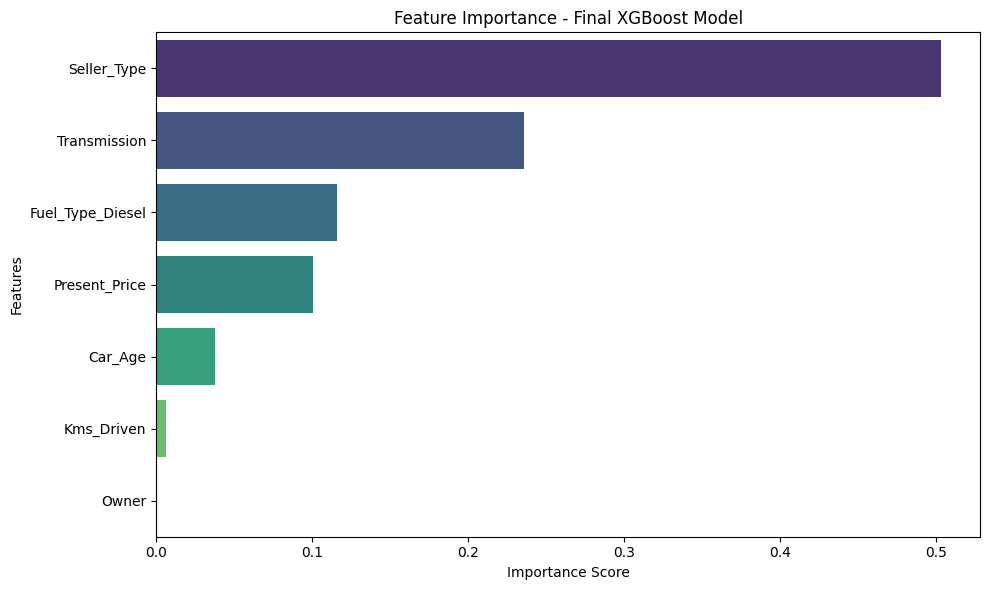

In [741]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Final XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

The feature importance analysis of our final XGBoost model highlights Seller_Type as the most influential predictor, accounting for over half of the model's decision-making. This suggests that whether a car is sold by a dealer or an individual has a substantial impact on its resale price.

Transmission and Fuel_Type_Diesel follow, indicating that vehicle specifications still play a meaningful role, though secondary. Interestingly, Present_Price, which was initially expected to be dominant, ranked lower — likely because its influence is absorbed through interactions with other features.

Car_Age, Kms_Driven, and Owner have minimal contribution, with Owner contributing virtually nothing, which may justify dropping or simplifying this feature in future iterations.

These insights are valuable for both pricing strategy and feature selection, emphasizing that who sells the car often matters more than what is being sold.

## 10. Residual and Predictive Plots

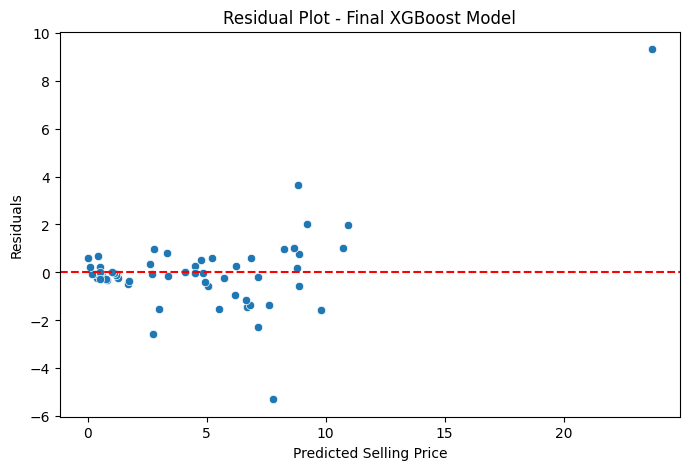

In [743]:
# Predict on test set
y_pred_test = best_xgb_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_test

# Plot residuals
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot - Final XGBoost Model')
plt.show()

The residual plot shows a healthy distribution of residuals clustered around zero, suggesting that the model's predictions are generally well-calibrated across the price range. Most prediction errors fall within a tight band, which is a strong indicator of stability.

However, one notable outlier with a large positive residual indicates a case where the model significantly underpredicted the actual price — likely an unusual high-end car. This single case does not invalidate the model, but it highlights the importance of understanding edge cases in the dataset.

Overall, the residual spread is narrow and centered, supporting the reliability of the XGBoost model’s predictions.

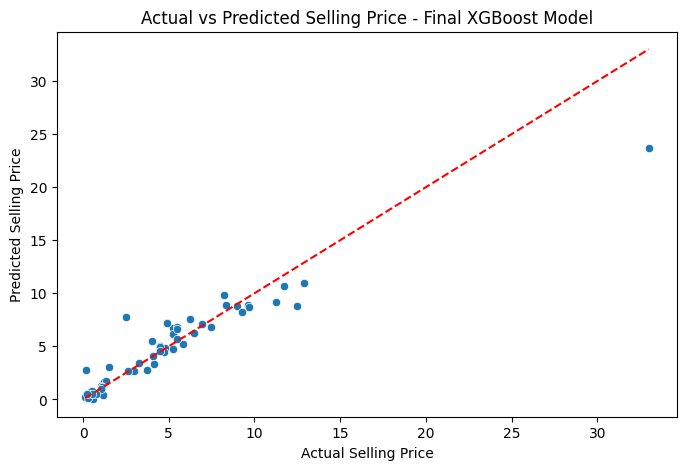

In [746]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price - Final XGBoost Model')
plt.show()

This indicates that the model is capturing the underlying patterns in the data effectively and is producing accurate predictions across a wide range of prices.

One exception stands out—a high actual price that the model underpredicts. This outlier is likely an uncommon high-value vehicle and should be interpreted with domain context in mind.

Overall, the model demonstrates excellent generalization and predictive reliability, particularly within the more common price ranges.

## 11. Cross-Validation

In [750]:
from sklearn.model_selection import cross_val_score

cv_r2_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_r2_scores}")
print(f"Average Cross-Validated R²: {np.mean(cv_r2_scores):.4f}")

Cross-Validation R² Scores: [0.93930373 0.94441364 0.95209966 0.97484995 0.97155183]
Average Cross-Validated R²: 0.9564


The XGBoost model demonstrates consistently high R² scores across all five cross-validation folds, ranging from 0.94 to 0.97, with an impressive average R² of 0.956. This level of consistency highlights the model's strong generalization capability and robustness across different subsets of the training data. It suggests the model is not overly reliant on specific data segments and is well-suited for making accurate predictions in production.

## 12. Export Model

In [755]:
import joblib

# Save best XGBoost model
joblib.dump(best_xgb_model, 'final_xgboost_model.pkl')

# Save scaler
joblib.dump(scaler, 'final_scaler.pkl')

['final_scaler.pkl']

In [757]:
# Load model
loaded_model = joblib.load('final_xgboost_model.pkl')

# Load scaler
loaded_scaler = joblib.load('final_scaler.pkl')

# Example new input
new_data = np.array([[5.59, 27000, 0, 10, 1, 0, 0]])  # Update structure based on feature order

# Scale input
new_data_scaled = loaded_scaler.transform(new_data)

# Predict
predicted_price = loaded_model.predict(new_data_scaled)
print(f"Predicted Selling Price: {predicted_price[0]:.2f}")

Predicted Selling Price: 3.73
